### Problem Statement
Many people struggle to understand their actual fitness level and follow the right plan.They often depend on general workout and diet tips that don’t fit their body.
This leads to poor progress and loss of motivation.There is a need for a system that predicts fitness levels using personal data.Our project uses Machine Learning to give accurate fitness predictions and personalized recommendations.

## 1️⃣ Data Collection

#### import required libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

#### import dataset

In [41]:
df = pd.read_csv("fitness_dataset.csv")

In [42]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


#### about columns

## 2️⃣ Data Inspection & Understanding

In [43]:
df.shape

(2000, 11)

##### there are 2000 rows and 11 columns

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


## 🔍 Key Insights
- Only one column (sleep_hours) has missing values — about 8% of the data.
- The dataset includes both numerical and categorical features.
- It’s suitable for a binary classification task (Fit vs Not Fit).
- Important lifestyle factors like sleep, smoking habits, and activity level are included, making it ideal for fitness prediction.

In [45]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


## 🧠 Key Observations
- The average age is 49 years, ranging from 18 to 79. The dataset includes both young and older adults.
- Average height is 174.5 cm, with values ranging from 150 to 199 cm.
- Average weight is 83.5 kg, ranging from 30 to 250 kg, showing a wide variety of body types.
- Mean heart rate is 70.3 bpm, which is within a normal resting range (60–100 bpm).
- Average blood pressure is 119.9 mmHg, indicating most people are in a healthy range.
- Average sleep duration is 7.5 hours, ranging from 4 to 12 hours — ideal sleep for most adults. (Note: 160 missing values)
- Mean nutrition score is 5.0 on a scale of 0–10 — suggesting moderate diet quality overall.
- Average value is 3.0, showing a balanced activity level among participants.
- Around 40% of individuals are fit (value = 1) and 60% are not fit (value = 0), indicating a slightly imbalanced target variable.

## 3️⃣ Handling Missing Data

##### Detect missing values:

In [46]:
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [47]:
df.isnull().mean()*100

age                  0.0
height_cm            0.0
weight_kg            0.0
heart_rate           0.0
blood_pressure       0.0
sleep_hours          8.0
nutrition_quality    0.0
activity_index       0.0
smokes               0.0
gender               0.0
is_fit               0.0
dtype: float64

- so,there is only one column have  missing values and that is sleep_hours with 180(8%) values.

In [48]:
df[df['sleep_hours'].isnull()].index

Index([   0,    2,   14,   22,   34,   35,   57,   59,   68,   70,
       ...
       1911, 1926, 1928, 1929, 1930, 1944, 1949, 1983, 1984, 1995],
      dtype='int64', length=160)

In [49]:
## df["sleep_hours"] = df["sleep_hours"].fillna(df["sleep_hours"].median())
df.dropna(inplace=True)

In [50]:
df.isna().sum()

age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64

## 4️⃣ Handling Duplicates

####  check duplicates

In [51]:
df[df.duplicated()]

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit


- There is no duplicates in data

## 5️⃣ Handling Outliers

##### detecting outliers

In [52]:
numeric_cols  = df.select_dtypes(include=["number"]).columns

In [53]:
numeric_cols

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit'],
      dtype='object')

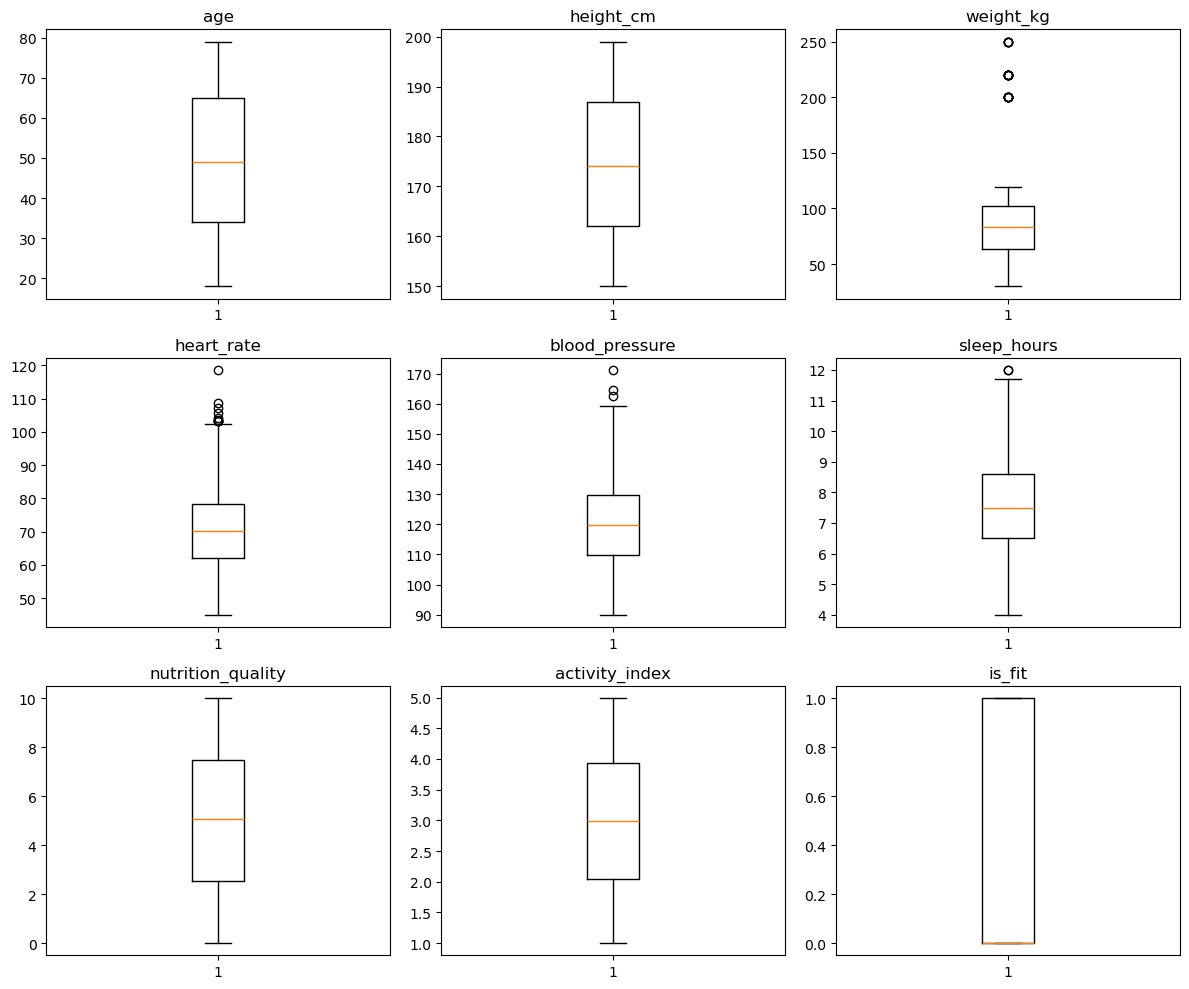

In [54]:
plt.figure(figsize=(12,10))
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [55]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper

# Example:
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers (lower={lower:.2f}, upper={upper:.2f})")

age: 0 outliers (lower=-12.50, upper=111.50)
height_cm: 0 outliers (lower=124.50, upper=224.50)
weight_kg: 19 outliers (lower=7.00, upper=159.00)
heart_rate: 10 outliers (lower=37.80, upper=102.60)
blood_pressure: 3 outliers (lower=79.80, upper=159.80)
sleep_hours: 2 outliers (lower=3.35, upper=11.75)
nutrition_quality: 0 outliers (lower=-4.83, upper=14.84)
activity_index: 0 outliers (lower=-0.78, upper=6.75)
is_fit: 0 outliers (lower=-1.50, upper=2.50)


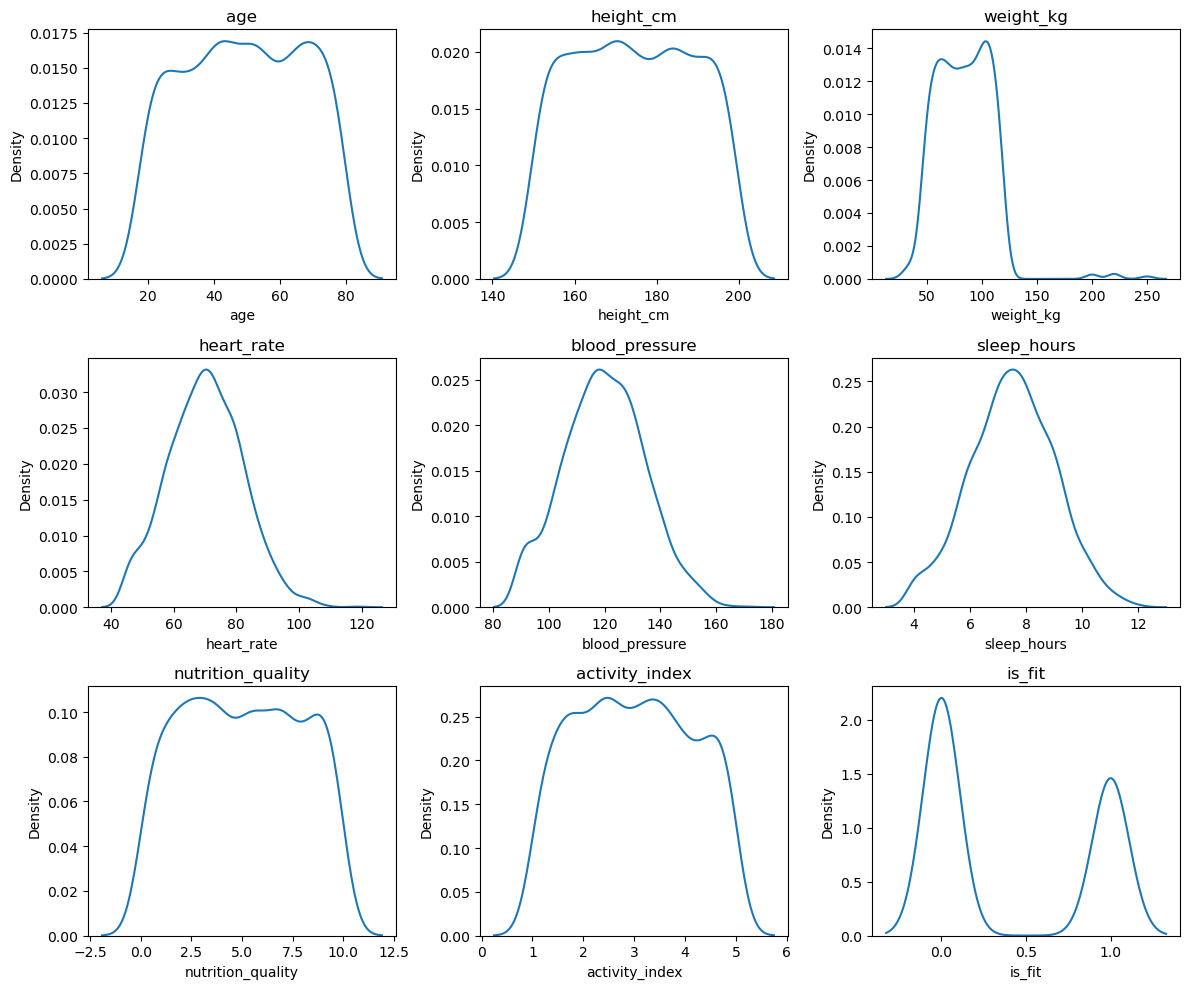

In [56]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df[col])  # Use Seaborn's histplot for KDE
    plt.title(col)
plt.tight_layout()
plt.show()

##### caping outliers

In [57]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower, upper)
    return df

# Apply to only columns with outliers
outlier_cols = ['weight_kg', 'heart_rate', 'blood_pressure', 'sleep_hours']
df = cap_outliers_iqr(df, outlier_cols)


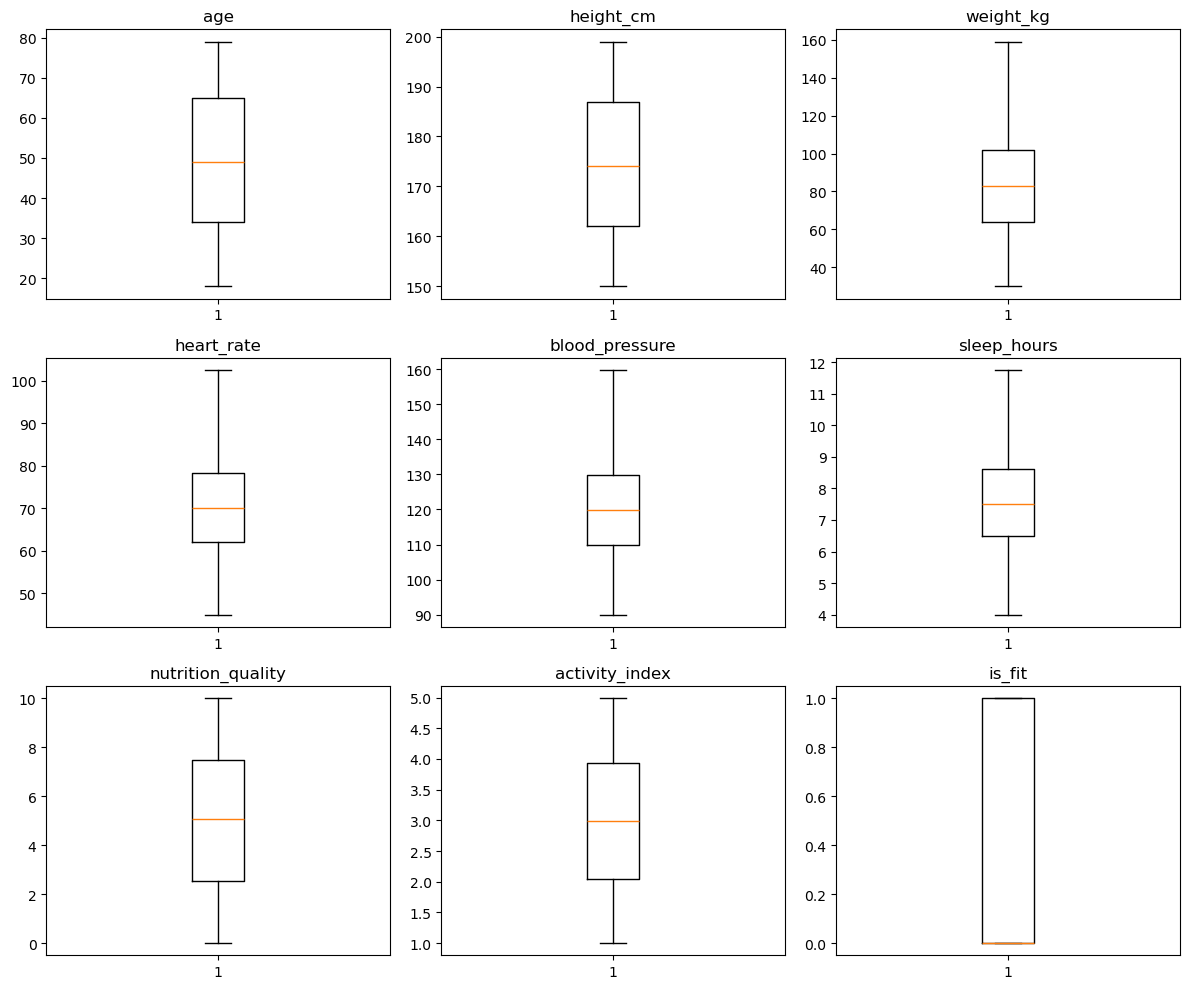

In [58]:
plt.figure(figsize=(12,10))
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [59]:
df.skew(numeric_only=True)

age                 -0.040183
height_cm            0.009334
weight_kg            0.202485
heart_rate           0.101489
blood_pressure       0.064810
sleep_hours         -0.022348
nutrition_quality    0.014747
activity_index       0.036544
is_fit               0.415528
dtype: float64

####  i checked skweness all the values are near to zero

## 6️⃣ Data Type Conversion

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840 entries, 1 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1840 non-null   int64  
 1   height_cm          1840 non-null   int64  
 2   weight_kg          1840 non-null   int64  
 3   heart_rate         1840 non-null   float64
 4   blood_pressure     1840 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  1840 non-null   float64
 7   activity_index     1840 non-null   float64
 8   smokes             1840 non-null   object 
 9   gender             1840 non-null   object 
 10  is_fit             1840 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.5+ KB


In [61]:
df['smokes'] = df['smokes'].astype('category')

In [62]:
df["smokes"] = df["smokes"].replace({"yes": 1, "no": 0}).astype(int)

In [63]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1,F,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,1,M,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,1,F,0


## EDA(Explority Data Analysis)

### Uinvariae Analysis

In [64]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,is_fit
count,1840.000000,1840.00000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,49.135870,174.50163,83.170109,70.177717,119.875924,7.513043,5.023924,2.998114,0.446196,0.398370
std,17.950116,14.40100,23.027748,11.724138,14.467474,1.501241,2.865756,1.132126,0.497232,0.489695
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.800000,6.500000,2.547500,2.047500,0.000000,0.000000
50%,49.000000,174.00000,83.000000,70.100000,119.800000,7.500000,5.050000,2.990000,0.000000,0.000000
75%,65.000000,187.00000,102.000000,78.300000,129.800000,8.600000,7.462500,3.930000,1.000000,1.000000
max,79.000000,199.00000,159.000000,102.600000,159.800000,11.750000,10.000000,4.990000,1.000000,1.000000


## 🧍 Demographics
- Average Age: 49 years → Your dataset mostly has middle-aged people.
- Age Range: 18 to 79 → It includes both young adults and older individuals.
## 📏 Physical Stats
- Average Height: 174.5 cm → That’s about 5'8" (typical adult height).
- Average Weight: 83.2 kg → Slightly on the higher side; could indicate a mix of fit and overweight individuals.
- Weight Range: 30 to 159 kg → Very wide, suggesting both underweight and obese people exist.
## ❤️ Health Indicators
- Average Heart Rate: 70 bpm → Normal resting heart rate range.
- Average Blood Pressure: ~120 mmHg → Normal average, but max (160) shows some high BP cases.
## 😴 Lifestyle & Habits
- Average Sleep: 7.5 hours → Healthy average sleep duration.
- Range: 4 to 11.75 hours → Some sleep too little or too much.
- Nutrition Quality: Average ~5 (on 0–10 scale) → Moderate diet quality overall.
- Activity Index: Around 3 (on 1–5 scale) → Indicates moderate activity levels.
- Smokers: Mean = 0.45 → ~45% of people smoke.
## 💪 Fitness
- Is Fit: Mean = 0.40 → About 40% of people are considered fit.
- This means less than half of your dataset is fit — possibly linked to higher weight, smoking, or poor nutrition.

## 🧩 Summary
- ➡️ Most people in your dataset are middle-aged, moderately active, sleep decently, but less than half are fit.
- ➡️ Health risks: Around half smoke and some show high blood pressure or overweight.
- ➡️ Positive signs: Heart rate and sleep averages look healthy.

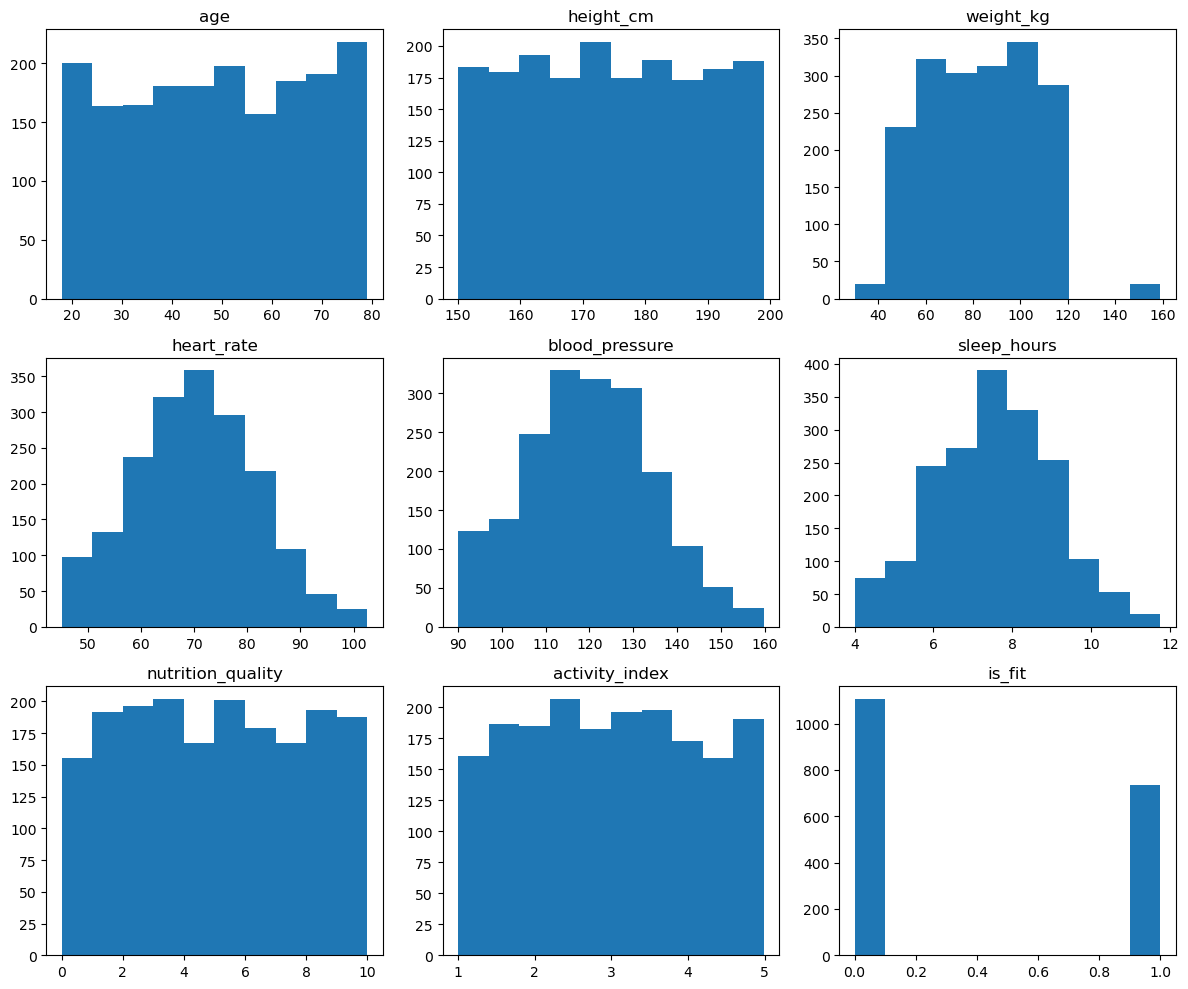

In [65]:
plt.figure(figsize=(12,10))
for i ,col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## biavariate Analysis

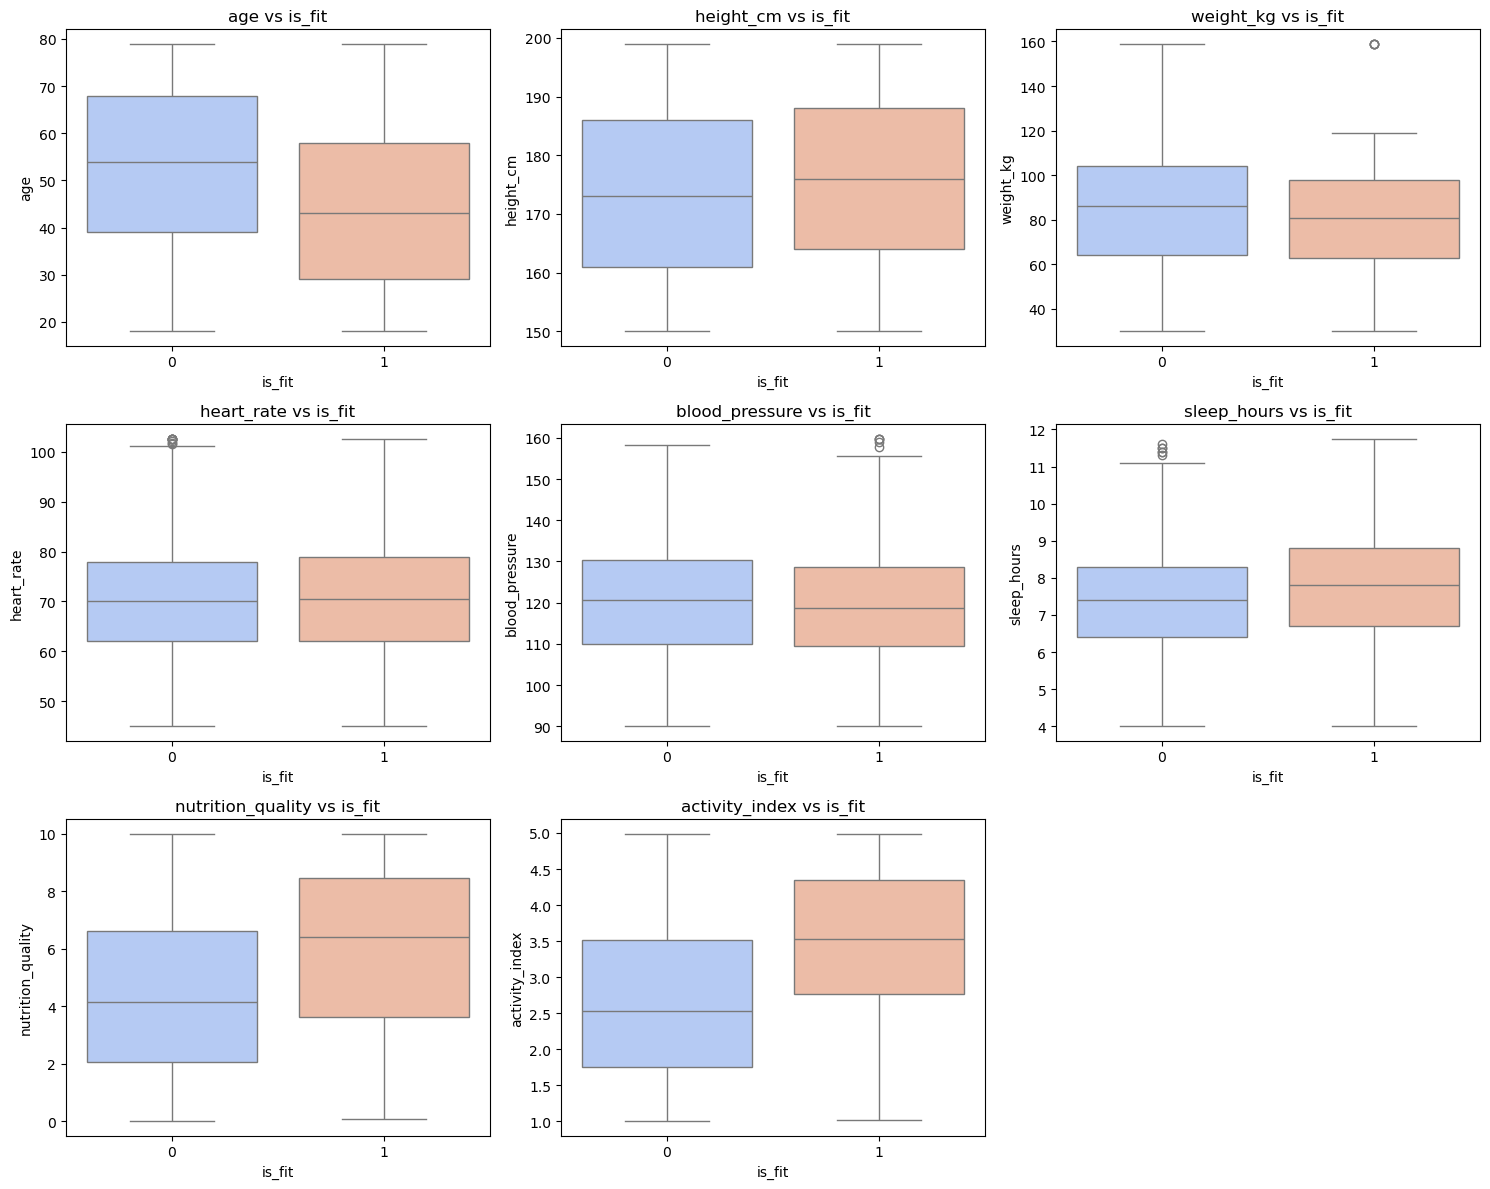

In [66]:
num_features = ['age', 'height_cm', 'weight_kg', 'heart_rate',
                'blood_pressure', 'sleep_hours', 'nutrition_quality', 'activity_index']

plt.figure(figsize=(15, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='is_fit', y=col, palette='coolwarm')
    plt.title(f'{col} vs is_fit')

plt.tight_layout()
plt.show()

## 🧓 Age vs is_fit
- Fit individuals (1) tend to be younger overall.
- The median age of the fit group is lower than that of the not-fit group.
## The not-fit group also shows a wider spread (greater variability in age).
- 📊 Insight: Younger people are more likely to be fit.
## 📏 Height (cm) vs is_fit
- The fit group has a slightly higher median height than the not-fit group.
- The overall spread is similar, but the distribution for fit individuals leans toward taller heights.
- 📊 Insight: Taller individuals tend to be slightly more likely to be fit.
## ⚖️ Weight (kg) vs is_fit
- Fit individuals have a lower median weight compared to not-fit individuals.
- The not-fit group shows a larger upper range, indicating more overweight individuals.
- 📊 Insight: Higher weight is associated with lower fitness levels.
## ❤️ Heart Rate vs is_fit
- Fit individuals tend to have a lower resting heart rate on average.
- The median for the fit group is lower, with fewer high outliers.
- 📊 Insight: Lower heart rate correlates with better fitness.
## 🩸 Blood Pressure vs is_fit
- The fit group has a slightly lower median blood pressure.
- Both groups show similar spread, but not-fit individuals have a few higher outliers.
- 📊 Insight: Blood pressure control is generally better among fit individuals.

## 😴 Sleep Hours vs is_fit
- Fit individuals tend to sleep slightly more hours (higher median).
- The not-fit group has more variability and a few short-sleep outliers.
- 📊 Insight: Adequate sleep duration is associated with better fitness.

In [67]:
df.corr(numeric_only=True)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,is_fit
age,1.000000,0.015988,0.029876,-0.024240,-0.027504,-0.032847,0.008484,0.031754,-0.007771,-0.220018
height_cm,0.015988,1.000000,0.015553,-0.011898,-0.062345,-0.001653,0.023956,0.026980,0.010872,0.062712
weight_kg,0.029876,0.015553,1.000000,-0.005861,-0.002137,0.004870,0.002646,-0.028679,0.041760,-0.079213
heart_rate,-0.024240,-0.011898,-0.005861,1.000000,0.022545,-0.005026,0.001743,0.031569,0.003292,0.032698
blood_pressure,-0.027504,-0.062345,-0.002137,0.022545,1.000000,-0.008059,-0.020809,-0.000511,-0.025673,-0.056288
sleep_hours,-0.032847,-0.001653,0.004870,-0.005026,-0.008059,1.000000,-0.030933,-0.032919,-0.028526,0.108909
nutrition_quality,0.008484,0.023956,0.002646,0.001743,-0.020809,-0.030933,1.000000,0.034417,-0.002706,0.260011
activity_index,0.031754,0.026980,-0.028679,0.031569,-0.000511,-0.032919,0.034417,1.000000,-0.019901,0.347111
smokes,-0.007771,0.010872,0.041760,0.003292,-0.025673,-0.028526,-0.002706,-0.019901,1.000000,-0.297157
is_fit,-0.220018,0.062712,-0.079213,0.032698,-0.056288,0.108909,0.260011,0.347111,-0.297157,1.000000


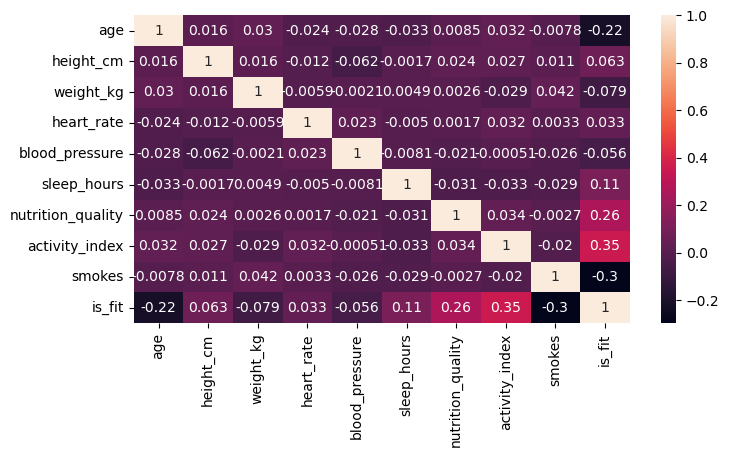

In [68]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

## 7️⃣ Encoding Categorical Data

In [69]:
le = LabelEncoder()
le

LabelEncoder()

In [70]:
df["gender"] =  le.fit_transform(df["gender"])

In [71]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,0,1
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,1,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,1,0,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,1,1,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,1,0,0


## 8️⃣ Feature Selection

In [72]:
X = df.drop(columns="is_fit")
y = df["is_fit"]

In [73]:
from sklearn.feature_selection import f_classif

In [74]:
f_stat, p_val = f_classif(X, y)
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_stat,
    'P-Value': p_val
})
feature_scores

,Feature,F-Score,P-Value
0,age,93.500291,1.315064e-21
1,height_cm,7.257096,7.126374e-03
2,weight_kg,11.605711,6.716592e-04
3,heart_rate,1.967242,1.609098e-01
4,blood_pressure,5.841817,1.574647e-02
5,sleep_hours,22.062639,2.834699e-06
6,nutrition_quality,133.268588,8.196910e-30
7,activity_index,251.790751,3.066047e-53
8,smokes,178.018656,7.894990e-39
9,gender,41.708013,1.352855e-10


In [75]:
# Determine importance based on F-score and p-value
def importance(row):
    if row['P-Value'] < 0.05:
        if row['F-Score'] > 100:  # adjust threshold for very strong features
            return 'Very significant ✅'
        else:
            return 'Significant'
    elif row['P-Value'] < 0.2:
        return 'Low significance'
    else:
        return 'Not significant'

feature_scores['Importance'] = feature_scores.apply(importance, axis=1)

In [76]:
feature_scores

,Feature,F-Score,P-Value,Importance
0,age,93.500291,1.315064e-21,Significant
1,height_cm,7.257096,7.126374e-03,Significant
2,weight_kg,11.605711,6.716592e-04,Significant
3,heart_rate,1.967242,1.609098e-01,Low significance
4,blood_pressure,5.841817,1.574647e-02,Significant
5,sleep_hours,22.062639,2.834699e-06,Significant
6,nutrition_quality,133.268588,8.196910e-30,Very significant ✅
7,activity_index,251.790751,3.066047e-53,Very significant ✅
8,smokes,178.018656,7.894990e-39,Very significant ✅
9,gender,41.708013,1.352855e-10,Significant


In [77]:
data_dist = df["is_fit"].value_counts()   ## my data imbalaceing ,i need to make data into balancence data

In [78]:
data_dist 

is_fit
0    1107
1     733
Name: count, dtype: int64

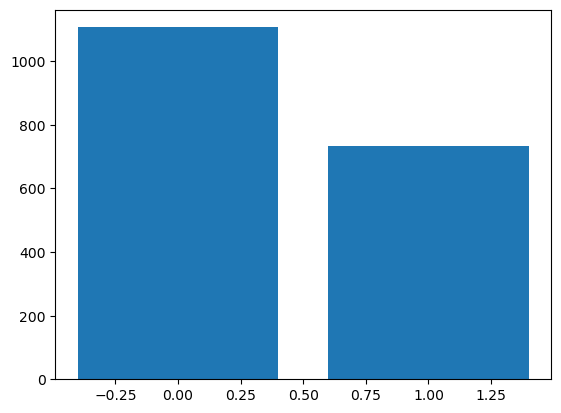

In [79]:
plt.bar(data_dist.index,data_dist.values)
plt.show()

##  Split the data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [81]:
from sklearn.preprocessing import StandardScaler

## Scale the features

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
X_train_scaled.shape,y_train.shape

((1472, 10), (1472,))

## Balancing Data

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smote = SMOTE(random_state=42)
X_train,y_train =  smote.fit_resample(X_train_scaled,y_train)

In [86]:
X_train.shape,y_train.shape

((1772, 10), (1772,))

In [87]:
y_train.value_counts()

is_fit
0    886
1    886
Name: count, dtype: int64

In [88]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

algorithm_names = []
precision_list = []
recall_list = []
f1_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate main metric and supporting metrics
    prec = round(precision_score(y_test, y_pred, average='weighted'), 3)
    rec = round(recall_score(y_test, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
    
    # Store results
    algorithm_names.append(name)
    precision_list.append(prec)
    recall_list.append(rec)
    f1_list.append(f1)
    
    # Print results
    print(f"\n🔹 Model: {name}")
    print("⚖️ Precision (Main Metric):", prec)
    print("📈 Recall:", rec)
    print("🏆 F1-Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Create comparison DataFrame — Precision as main metric
df_alg_score = pd.DataFrame({
    "Algorithm_Name": algorithm_names,
    "Precision_Score": precision_list,
    "Recall": recall_list,
    "F1_Score": f1_list
})

print("\n🏁 Model Precision Summary:")
print(df_alg_score)



🔹 Model: Logistic Regression
⚖️ Precision (Main Metric): 0.794
📈 Recall: 0.791
🏆 F1-Score: 0.792
Confusion Matrix:
 [[177  44]
 [ 33 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       221
           1       0.72      0.78      0.75       147

    accuracy                           0.79       368
   macro avg       0.78      0.79      0.78       368
weighted avg       0.79      0.79      0.79       368


🔹 Model: Decision Tree
⚖️ Precision (Main Metric): 0.697
📈 Recall: 0.696
🏆 F1-Score: 0.696
Confusion Matrix:
 [[163  58]
 [ 54  93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       221
           1       0.62      0.63      0.62       147

    accuracy                           0.70       368
   macro avg       0.68      0.69      0.68       368
weighted avg       0.70      0.70      0.70       368


🔹 Model: Random Forest


In [90]:
# n_estimators=300,
# min_samples_split=2,
# min_samples_leaf=2,
# max_depth=None,
# criterion='entropy',
# bootstrap=True

In [91]:
df_alg_score

,Algorithm_Name,Precision_Score,Recall,F1_Score
0,Logistic Regression,0.794,0.791,0.792
1,Decision Tree,0.697,0.696,0.696
2,Random Forest,0.800,0.802,0.801
3,Support Vector Machine,0.806,0.802,0.803


In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, classification_report
import numpy as np

# ✅ Parameter Distributions for Random Search
param_distributions = {
    "Logistic Regression": {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'C': np.logspace(-3, 3, 7),
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 200, 500]
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200, 300, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "Support Vector Machine": {
        'C': np.logspace(-3, 3, 7),
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }
}

# ✅ Run Randomized Search with Precision as scoring metric
best_models = {}
algorithms = []
cv_scores = []

for name, model in models.items():
    print(f"🔍 Tuning hyperparameters for {name}...")
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[name],
        n_iter=20,
        scoring='precision_weighted',  # <-- use precision as the metric
        cv=5,
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_
    algorithms.append(name)
    cv_scores.append(random_search.best_score_)
    
    print(f"✅ Best Parameters for {name}: {random_search.best_params_}")
    print(f"✅ Best CV Weighted Precision for {name}: {random_search.best_score_:.4f}\n")

# ✅ Evaluate Tuned Models on Test Set using Precision
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    test_precision = precision_score(y_test, y_pred, average='weighted')
    
    print(f"🏆 {name} Test Weighted Precision: {test_precision:.4f}")
    print(classification_report(y_test, y_pred))


🔍 Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'penalty': None, 'max_iter': 200, 'C': 10.0}
✅ Best CV Weighted Precision for Logistic Regression: 0.7922

🔍 Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
✅ Best CV Weighted Precision for Decision Tree: 0.7261

🔍 Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
✅ Best CV Weighted Precision for Random Forest: 0.8151

🔍 Tuning hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 20 candidates, tota

In [101]:
after_tuning = pd.DataFrame({"Algorithum":algorithms,"Precisin_Score":cv_scores})                                                                                                             

In [102]:
after_tuning

,Algorithum,Precisin_Score
0,Logistic Regression,0.792236
1,Decision Tree,0.726121
2,Random Forest,0.815055
3,Support Vector Machine,0.800857
